<a href="https://colab.research.google.com/github/SudheenaMisra/Data-science_CourseWork/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from collections import Counter
from IPython.core.display import display, HTML
sns.set_style('darkgrid')



In [ ]:
# reading the data 
data= pd.read_csv('https://raw.githubusercontent.com/SudheenaMisra/Datasets/main/CE802/CE802_P2_Data.csv')
#inspecting the first 5 rows 
data.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,3.20,-4.91,-41.64,-21.63,8.41,2,5.42,-84.01,-9.40,76.72,-0.42,36,0.33,30.60,NaN,False
1,3.98,-5.25,-47.64,-23.43,8.66,2,4.32,-83.01,-11.16,2.72,0.50,111,0.84,39.42,9.26,True
2,12.60,0.41,-50.64,-15.51,16.34,20,-4.00,25.99,-15.08,450.72,-3.60,525,5.10,21.78,NaN,False
3,14.70,1.09,-50.64,-4.74,15.09,20,-8.16,10.99,-13.12,190.72,-5.71,660,7.25,15.78,6.57,False
4,2.74,-3.86,-35.64,-23.91,8.67,2,2.80,-53.01,-19.22,24.72,0.59,33,0.85,25.08,NaN,True


### Data Preprocessing and Visualization 

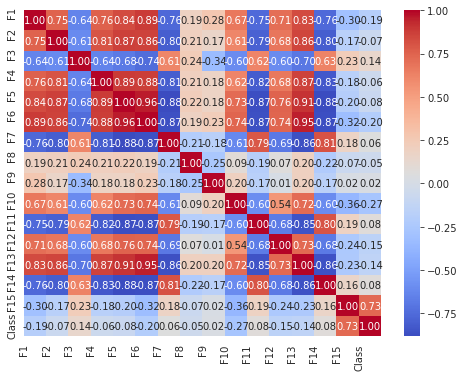

<Figure size 432x288 with 0 Axes>

In [ ]:
#Correlation matrix
corr = data.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(8,6))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()
plt.savefig("corr.pdf", dpi=2000)

In [ ]:
data.dtypes


F1       float64
F2       float64
F3       float64
F4       float64
F5       float64
F6         int64
F7       float64
F8       float64
F9       float64
F10      float64
F11      float64
F12        int64
F13      float64
F14      float64
F15      float64
Class       bool
dtype: object

In [ ]:
data.isna().sum()

F1         0
F2         0
F3         0
F4         0
F5         0
F6         0
F7         0
F8         0
F9         0
F10        0
F11        0
F12        0
F13        0
F14        0
F15      750
Class      0
dtype: int64

In [ ]:
data.shape

(1500, 16)

In [ ]:
#the feature f15 has half of the values missing so we choose to drop this column
data.drop("F15", axis=1, inplace=True)

Here our features are columns F1,F2,....F14 and target variable is the "class" column

In [ ]:
#Assigning all features to x and target to y
x = data.loc[:, data.columns != 'Class'].to_numpy()
y = data.loc[:, 'Class'].to_numpy()
print(x.shape, y.shape)

(1500, 14) (1500,)


##### False predictors
In some ocassions we may have a variable that is a false predictor, meaning that it's been introduced in the data by mistake and contains information about the label. Let's imagine that we have a dataset of the clients of a bank, and we want to predict if a client will buy an insurance. One of the variables could be how much the client pays to the bank for its services. If this prize includes the cost of the insurance, this will result in a variable that may have 'perfect' prediction power but won't work during the deployment because we will detect only the clients that already have an insurance.

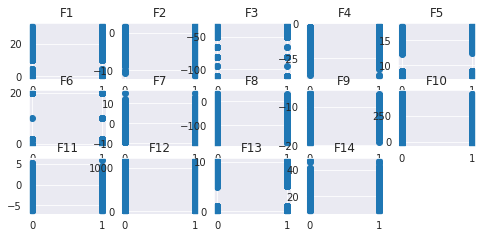

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
for i in range(x.shape[1]):
    plt.subplot(5, 5, i+1)
    plt.scatter(y,x[:,i])
    plt.xticks([0, 1])
    plt.title(data.columns[i])

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [ ]:
#printing the shapes
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (1125, 14)
Shape of X_test:  (375, 14)
Shape of y_train:  (1125,)
Shape of y_test (375,)


### Fitting a Decision tree classifier

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
# Fitting classifier to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier()

steps = [
    ('scalar', StandardScaler()),
    ('model', DecisionTreeClassifier())
]
dt_pipe = Pipeline(steps)

In [ ]:
# Applying Grid Search to find the best model and the best parameters
parameters = [ { "model__max_depth": np.arange(1,21),
                 "model__min_samples_leaf": [1, 5, 10, 20, 50, 100],
                 "model__min_samples_split": np.arange(2, 11),
                 "model__criterion": ["gini"],
                 "model__random_state" : [42]}
            ]
classifier_dt = GridSearchCV(estimator = dt_pipe,
                           param_grid  = parameters,
                           cv = 3,
                           iid = False,
                           n_jobs = -1)
classifier_dt = classifier_dt.fit(X_train, y_train.ravel())

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


In [ ]:
#predicting the accuracy of training and test set 
from sklearn.metrics import accuracy_score
y_pred_dt_train = classifier_dt.predict(X_train)
accuracy_dt_train = accuracy_score(y_train, y_pred_dt_train)
print("Training set: ", accuracy_dt_train)

y_pred_dt_test = classifier_dt.predict(X_test)
accuracy_dt_test = accuracy_score(y_test, y_pred_dt_test)
print("Test set: ", accuracy_dt_test)

Training set:  0.9893333333333333
Test set:  0.7626666666666667


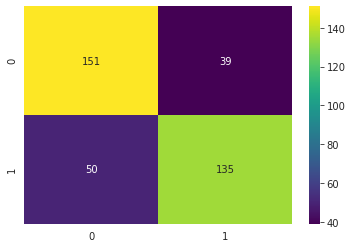

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_dt_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()

### Fitting a Naive Bayes Classifier

In [ ]:
# Fitting classifier to the Training set
from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()
classifier_nb.fit(X_train, y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred_nb_train = classifier_nb.predict(X_train)
accuracy_nb_train = accuracy_score(y_train, y_pred_nb_train)
print("Training set: ", accuracy_nb_train)

y_pred_nb_test = classifier_nb.predict(X_test)
accuracy_nb_test = accuracy_score(y_test, y_pred_nb_test)
print("Test set: ", accuracy_nb_test)

Training set:  0.6026666666666667
Test set:  0.584


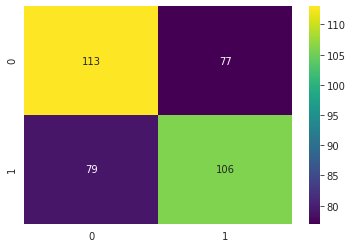

In [ ]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_nb_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()

### Fitting a Logistic Regression model

In [ ]:
# Fitting Logistic Regression to the Training set
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

classifier_lr = LogisticRegression()
steps = [
    ('scalar', StandardScaler()),
    ('model', LogisticRegression())
]

lr_pipe = Pipeline(steps)

In [ ]:
parameters = { 'model__C' : [1,10,100,1000,10000],
               'model__fit_intercept' : [True],
               'model__multi_class' : ['auto'],
               'model__tol' : [0.0001],
               'model__solver' : ['newton-cg', 'lbfgs', 'sag', 'saga'],
               'model__n_jobs' : [-1],
               'model__max_iter' : [5000],
               'model__random_state': [42] 
}
classifier_lr = GridSearchCV(lr_pipe, parameters, iid=False, cv = 3)
classifier_lr = classifier_lr.fit(X_train, y_train.ravel())

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


In [ ]:
from sklearn.metrics import accuracy_score

y_pred_lr_train = classifier_lr.predict(X_train)
accuracy_lr_train = accuracy_score(y_train, y_pred_lr_train)
print("Training set: ", accuracy_lr_train)

y_pred_lr_test = classifier_lr.predict(X_test)
accuracy_lr_test = accuracy_score(y_test, y_pred_lr_test)
print("Test set: ", accuracy_lr_test)

Training set:  0.856
Test set:  0.84


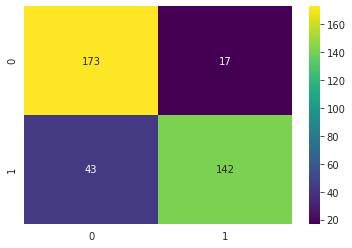

In [ ]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred_lr_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.show()

For the 3 machine learning models used above logistic regression has got the high accuracy. So I may decide to apply this model on a real test data.

### Predicting the Class of New real test data using Logistic regression

In [ ]:
#reading the real test data
Test_data = pd.read_csv("https://raw.githubusercontent.com/SudheenaMisra/Datasets/main/CE802/CE802_P2_Test.csv")
Test_data.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,19.10,0.05,-50.64,-9.21,17.09,20,-7.08,-34.01,-11.32,310.72,-5.48,900,5.45,10.38,NaN,NaN
1,14.60,1.32,-50.64,-2.64,17.04,20,4.74,-64.01,-9.72,170.72,-6.28,585,7.20,13.14,NaN,NaN
2,12.00,0.29,-80.64,-3.90,15.64,20,-7.62,-39.01,-7.52,60.72,-4.79,45,5.05,13.38,7.33,NaN
3,2.00,-5.10,-47.64,-25.92,8.10,2,4.42,-82.01,-17.14,14.72,-0.33,174,0.95,37.08,6.93,NaN
4,1.26,-3.43,-35.64,-18.60,8.87,2,1.88,-60.01,-14.36,14.72,-1.12,117,0.67,38.58,8.18,NaN


In [ ]:
Test_data.drop("F15", axis=1, inplace=True)

In [ ]:
#Assigning all features to x and target to y

x_test_real = data.loc[:, data.columns != 'Class'].to_numpy()
y = data.loc[:, 'Class'].to_numpy()
print(x.shape, y.shape)

(1500, 14) (1500,)


In [ ]:
classifier_lr = classifier_lr.fit(X_train, y_train.ravel())

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


In [ ]:
y_pred_real = classifier_lr.predict(x_test_real)
accuracy_lr_test = accuracy_score(y, y_pred_real)
print("Test set: ", accuracy_lr_test)

Test set:  0.852


In [ ]:
y_pred_real

array([False,  True, False, ..., False, False, False])

In [ ]:
a = y_pred_real
np.savetxt("predict_p2.csv", a, delimiter=",")